GUIDED PROJECT FROM DATAQUEST Part of the course SQL Fundamentals

Last updated: December 6, 2018

In [1]:
# Guided Project First Step: Initializing and running a query to see the tables available

# Initializing: Importing modules and making an sqlite3 connection
import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")

# Running a query to see the tables available
qry = "SELECT * FROM sqlite_master WHERE type = 'table';"
pd.read_sql_query(qry, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
# Guided Project Second Step: Running a query to see the contents of the table facts
qry2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(qry2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [3]:
# Guided Project Third Step: Calculating some summary statistics
qry3 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(qry3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
# Guided Project Fourth Step A: Investigating countries with population of 0
qry4 = "SELECT name FROM facts WHERE population == 0.0;"
pd.read_sql_query(qry4, conn)

,name
0,Antarctica


In [5]:
# Guided Project Fifth Step B: Investigating countries with population of 7256490011
qry5 = "SELECT name FROM facts WHERE population == 7256490011;"
pd.read_sql_query(qry5, conn)

,name
0,World


Not surprisingly, Antarctica registers 0 minimum population because there are really no permanent residents in Antarctica. The Antarctic Treaty declares the place as "a natural reserve, devoted to peace and science". [SOURCE: http://mentalfloss.com/article/29708/11-cold-hard-facts-about-antarctica]

Conversely, the World has a maximum population of over 7B. The count takes into account all the countries of the world.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025789C268D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000025789E65710>]], dtype=object)

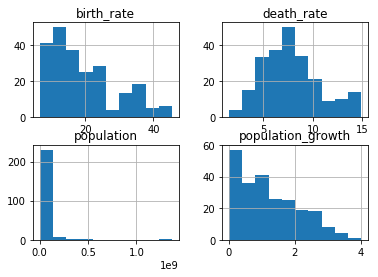

In [6]:
# Guided Project Sixth Step A: Getting the data for the columns population, population_growth, birth_rate, and death_rate
# Excludes data from Antarctica and World
qry6 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population > 0 AND population < 7256490011"
data = pd.read_sql_query(qry6, conn)

# Guided Project Sixth Step B: Plotting the histograms of the columns
%matplotlib inline

data.hist()

In [7]:
# Guided Project Next Step Question: Which countries have the highest population density?
# Note: Population density is the ratio of population to land area

qry7 = "SELECT name, population/area_land as population_density FROM facts ORDER BY population_density DESC LIMIT 10;"
pd.read_sql_query(qry7, conn)


,name,population_density
0,Macau,21168
1,Monaco,15267
2,Singapore,8259
3,Hong Kong,6655
4,Gaza Strip,5191
5,Gibraltar,4876
6,Bahrain,1771
7,Maldives,1319
8,Malta,1310
9,Bermuda,1299


Wikipedia data has the following figures:

1	 Macau (China) 21,339

2	 Monaco	18,589

3	 Singapore	7,796

4	 Hong Kong (China)	6,698

5	 Gibraltar (UK) 4,874

6	 Bahrain	1,917

7	 Vatican City	1,818

8	 Malta	1,510

9	 Maldives	1,269

10	 Bermuda (UK)	1,227

The discrepancies are due to the fact that the Guided Project database is based on the data retrieved in 2015. The Wikipedia data is based on data retrieved in 2018.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002578A2CA6A0>]], dtype=object)

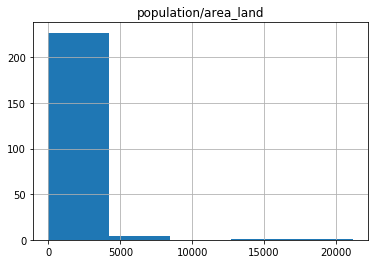

In [8]:
#Guided Project Next Step: Generate a histogram of population densities

qry8 = "SELECT population/area_land FROM facts"
data2 = pd.read_sql_query(qry8, conn)

data2.hist(bins = 5)

In [9]:
# Guided Project Next Step Question: Which countries have the highest ratios of water to land?

qry8 = "SELECT name, area_water / area_land as ratio_water_land FROM facts ORDER BY ratio_water_land DESC LIMIT 2;"
pd.read_sql_query(qry8, conn)

,name,ratio_water_land
0,British Indian Ocean Territory,905
1,Virgin Islands,4


The rest of the ratio is 0.

In [10]:
# Guided Project Next Step Question: Which countries have more water than land?

qry9 = "SELECT name FROM facts WHERE area_water > area_land"
pd.read_sql_query(qry9, conn)

,name
0,British Indian Ocean Territory
1,Virgin Islands
